In [266]:
import pandas as pd
import numpy as np


In [267]:
df=pd.read_csv("C:/Users/Anu/Desktop/dataa/SMA_DATA.csv")

In [268]:
df.head()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
0,1384,78.1,12.3,25627,69678,50.1,4083.9,72100,1,75.55
1,3719,43.9,9.4,13326,43292,53.9,3305.9,54542,2,56.03
2,3553,37.4,10.7,9724,33731,50.6,2066.3,33216,1,41.32
3,3916,29.9,8.8,6402,24167,52.2,1966.7,32906,2,67.38
4,2480,31.5,10.5,8502,16751,66.1,1514.5,26573,4,80.19


In [269]:
df.isnull().sum()

land_area         0
percent_city      0
percent_senior    0
physicians        0
hospital_beds     0
graduates         0
work_force        0
income            0
region            0
crime_rate        0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000202DF4DD9B0>,
      dtype=object)

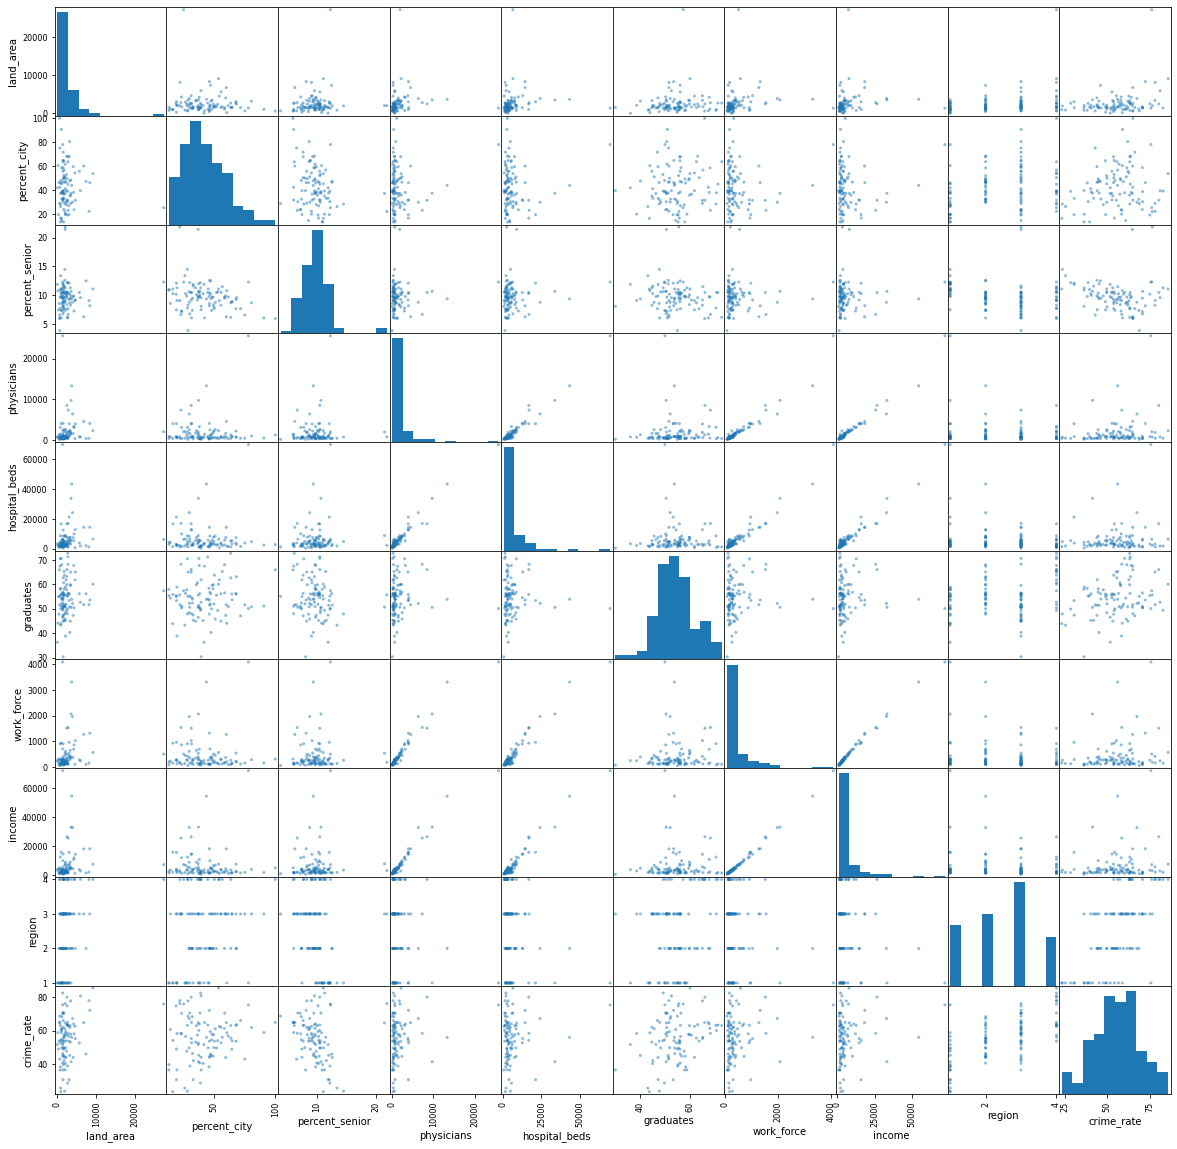

In [270]:
pd.plotting.scatter_matrix(df,figsize=(20,20),ax=None)

In [272]:
df.corr()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
land_area,1.000000,-0.077320,0.092226,0.085054,0.081034,0.088728,0.135792,0.111404,0.292392,0.293907
percent_city,-0.077320,1.000000,-0.250995,0.067391,0.052898,0.076720,0.016011,0.019235,0.235880,0.159596
percent_senior,0.092226,-0.250995,1.000000,0.056454,0.083775,-0.155695,0.035240,0.046073,-0.242811,-0.177992
physicians,0.085054,0.067391,0.056454,1.000000,0.974241,0.049500,0.965597,0.976209,-0.140961,0.187763
hospital_beds,0.081034,0.052898,0.083775,0.974241,1.000000,-0.003892,0.967913,0.974416,-0.220305,0.109799
graduates,0.088728,0.076720,-0.155695,0.049500,-0.003892,1.000000,0.044054,0.045578,0.246226,0.290880
work_force,0.135792,0.016011,0.035240,0.965597,0.967913,0.044054,1.000000,0.996735,-0.144022,0.175945
income,0.111404,0.019235,0.046073,0.976209,0.974416,0.045578,0.996735,1.000000,-0.152016,0.175797
region,0.292392,0.235880,-0.242811,-0.140961,-0.220305,0.246226,-0.144022,-0.152016,1.000000,0.636192
crime_rate,0.293907,0.159596,-0.177992,0.187763,0.109799,0.290880,0.175945,0.175797,0.636192,1.000000


In [273]:
# drop the below columns because from my EDA i observed that there is no relation between these columns and the crime rate
z=df.drop(["land_area","physicians","hospital_beds","work_force","income"],axis=1)
z.head()

,percent_city,percent_senior,graduates,region,crime_rate
0,78.1,12.3,50.1,1,75.55
1,43.9,9.4,53.9,2,56.03
2,37.4,10.7,50.6,1,41.32
3,29.9,8.8,52.2,2,67.38
4,31.5,10.5,66.1,4,80.19


In [274]:
## i check the  performance of my model with only four features that shown in the dataframe
x=z.iloc[:,0:4]
print(x.shape)
x.head()

(99, 4)


,percent_city,percent_senior,graduates,region
0,78.1,12.3,50.1,1
1,43.9,9.4,53.9,2
2,37.4,10.7,50.6,1
3,29.9,8.8,52.2,2
4,31.5,10.5,66.1,4


In [275]:
y=df["crime_rate"]
y

0     75.55
1     56.03
2     41.32
3     67.38
4     80.19
      ...  
94    70.66
95    36.36
96    60.16
97    36.33
98    68.76
Name: crime_rate, Length: 99, dtype: float64

In [276]:
y.shape

(99,)

In [277]:
#!pip install sklearn

In [278]:
from sklearn.model_selection import train_test_split

In [279]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [280]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((74, 4), (25, 4), (74,), (25,))

In [281]:
## in case of random state=42 and splitting startergy="random"
from sklearn.tree import DecisionTreeRegressor,plot_tree
reg=DecisionTreeRegressor(random_state=42,splitter="random")

In [282]:
reg.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='random')

In [283]:
y_pred=reg.predict(x_test)

In [284]:
#print(y_pred)
#print(y_pred.shape)
#print(type(y_pred))

In [285]:
#print(y_test.shape)
#print(y_test.values)
#print(type(y_test))

In [286]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

85.15462799999999

In [287]:
#plot_tree(reg,max_depth=2,fontsize=9)

In [288]:
#using "best splitting statergy, "mean_squared_error increased"
from sklearn.tree import DecisionTreeRegressor
reg=DecisionTreeRegressor(max_depth=3,random_state=42,splitter="best")

In [289]:
reg.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [290]:
y_pred=reg.predict(x_test)

In [291]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

127.90779412386746

In [292]:
# with random_state=1
from sklearn.tree import DecisionTreeRegressor
reg=DecisionTreeRegressor(max_depth=3,random_state=1,splitter="best")

In [293]:
reg.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [294]:
y_pred=reg.predict(x_test)

In [295]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

127.90779412386742